# Derivation of relaxation dispersion curves from MD trjectory based chemical shift time traces

## Theory 

Given a molecular dynamics simulation trajectory of a protein, chemical shifts (CS) can be predicted e.g. using [SPARTA+](https://link.springer.com/article/10.1007/s10858-010-9433-9). By taking the power spectrum of the CS time series using Fourier transformations one can arrive to the relaxation dispersion spectra of the analyzed nucleus or in other words the exchange related relaxation. 

$ \large R_{2,ex}(\nu) = \frac{1}{2} N dt  | \mathcal{F}(CS) |^2 $ where

$ \nu $ is frequency 

N is the number of simulation frames

dt is the time step between frames 

CS(t) is the predicted chemical shift in Hz over the simulation time t

Accordingly the calculation of the relaxation curve is very straight forward.


In [1]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

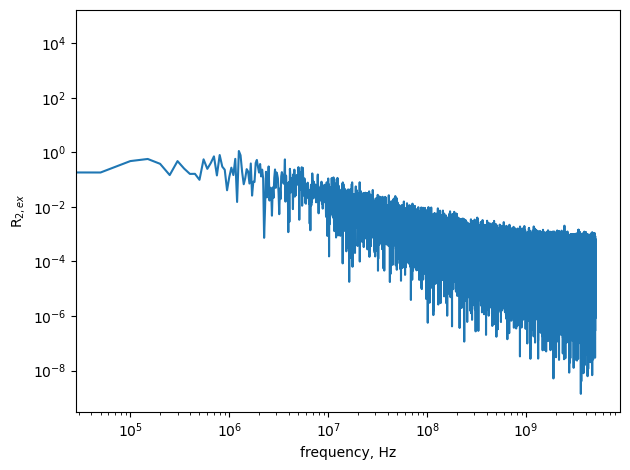

In [12]:
#load chemcal shift time trace
# first colums is time in ps, second column is chemical shift in ppm
CS = np.loadtxt("../sample_data/sample_22LEU_HN_CS.dat")

#number of data points
N = CS.shape[0]
#time step between frames, infered from input file
dt = 1e-9 * np.array([CS[1,0] - CS[0,0]],dtype=np.longdouble) # converted to seconds
#frequencies of the Fourier coefficients (correspond to the ν of the CPMG experiment)
nu = np.arange(N) / (dt*N) # in Hz

#proton Larmor frequency at the measurment magnetic field strength
Larmor = 1200.236

#the chemical shift is predicted in ppm, however, we need it as rad/s
CS = CS[:,1] * 2 * np.pi * Larmor

#do the Fourier transformation
fourier_transformed_CS = fft(CS,norm="forward")

#get the power spectrum a.k.a. relaxation dispersion curve by taking the absolute^2 of the transformed values
RD = np.abs(fourier_transformed_CS)**2

#the output is symmetric and we only need the first half of it
#the result needs also proper normalization by the length of the signal
RD = RD[:N//2] * 0.5 * dt * N 

plt.plot(nu[:N//2],RD)
plt.loglog()
plt.xlabel("frequency, Hz")
plt.ylabel("R$_{2,ex}$")
plt.tight_layout()